

#  Human Activity Recognition using Smartphones



>   📘 About the Dataset

>The Human Activity Recognition (HAR) dataset was generated using the embedded accelerometer and gyroscope of a smartphone to record 3-axial linear acceleration and 3-axial angular velocity at a 50 Hz sampling rate. Each subject performed various activities (walking, sitting, standing, laying, etc.), and sessions were video-recorded to manually label the activity classes.

>The raw sensor signals were preprocessed using noise filters and segmented into fixed-width sliding windows of 2.56 s with 50% overlap (yielding 128 readings per window). The acceleration signal, containing both gravitational and body motion components, was separated using a Butterworth low-pass filter with a 0.3 Hz cutoff frequency, isolating body acceleration.

>From each window, a 561-dimensional feature vector was computed by extracting statistical and spectral features in the time and frequency domains. The dataset was partitioned such that 70% of subjects’ data were used for model training and 30% for testing, ensuring subject-independent evaluation.

## Basic EDA and Pre-processing

In [4]:
# Basic EDA

# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
#loading dataset

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Datasets Loaded Successfully!")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Combine for EDA
data = pd.concat([train, test], axis=0, ignore_index=True)

print("\nColumns:", data.columns.tolist())

Datasets Loaded Successfully!
Train shape: (7352, 563)
Test shape: (2947, 563)

Columns: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correl

In [3]:
print("\nData Info:")
print(data.info())

print("\nMissing Values:\n", data.isnull().sum().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB
None

Missing Values:
 0


/tmp/ipython-input-61636000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Activity', data=data, palette='viridis')


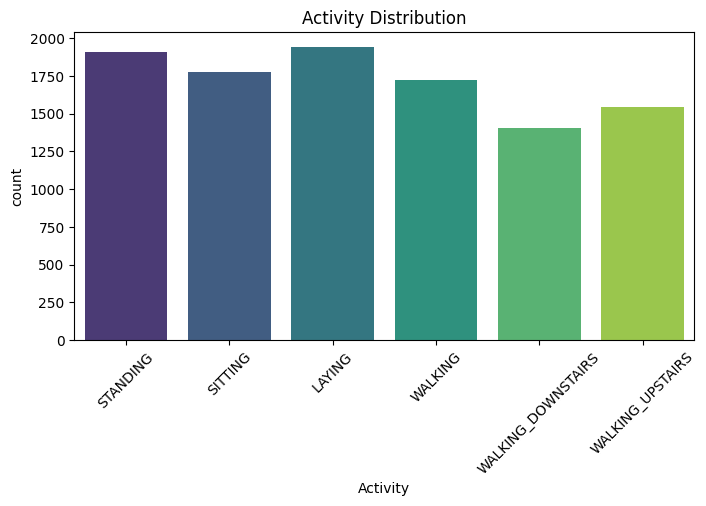

In [5]:
# visualising classifications
if 'Activity' in data.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='Activity', data=data, palette='viridis')
    plt.title("Activity Distribution")
    plt.xticks(rotation=45)
    plt.show()

In [7]:
print("\nStatistical Summary:")
print(data.describe().T.head(6))


Statistical Summary:
                     count      mean       std  min       25%       50%  \
tBodyAcc-mean()-X  10299.0  0.274347  0.067628 -1.0  0.262625  0.277174   
tBodyAcc-mean()-Y  10299.0 -0.017743  0.037128 -1.0 -0.024902 -0.017162   
tBodyAcc-mean()-Z  10299.0 -0.108925  0.053033 -1.0 -0.121019 -0.108596   
tBodyAcc-std()-X   10299.0 -0.607784  0.438694 -1.0 -0.992360 -0.943030   
tBodyAcc-std()-Y   10299.0 -0.510191  0.500240 -1.0 -0.976990 -0.835032   
tBodyAcc-std()-Z   10299.0 -0.613064  0.403657 -1.0 -0.979137 -0.850773   

                        75%  max  
tBodyAcc-mean()-X  0.288354  1.0  
tBodyAcc-mean()-Y -0.010625  1.0  
tBodyAcc-mean()-Z -0.097589  1.0  
tBodyAcc-std()-X  -0.250293  1.0  
tBodyAcc-std()-Y  -0.057336  1.0  
tBodyAcc-std()-Z  -0.278737  1.0  


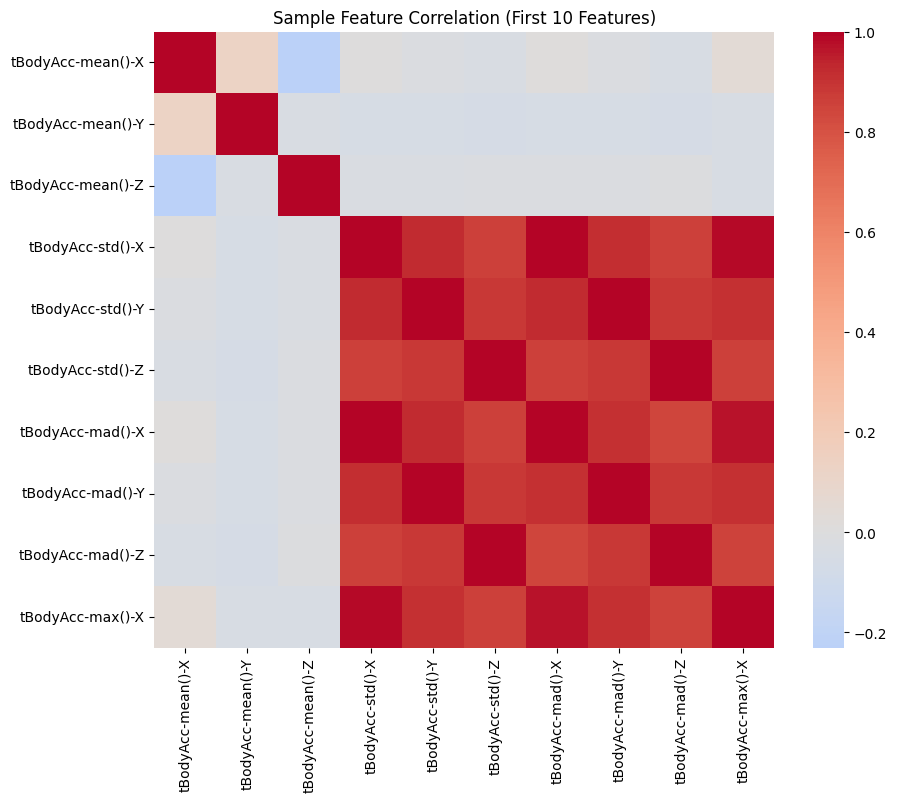

In [27]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr = data[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr.iloc[:10, :10], cmap='coolwarm', center=0)
plt.title("Sample Feature Correlation (First 10 Features)")
plt.show()

Since there are 563 features/columns we cannot visualize a heatmap with all features so here i have taken the first 10 as sample.

The heatmap doesnt really help out a lot since it is incomplete as all features not included. But it does help us realise why machine learning is needed here. From the heatmap we cannot pinpoint some features with most weightage. This is a situation that arises with most real world data where there are too many variables to take into account and all are highly interconnected.

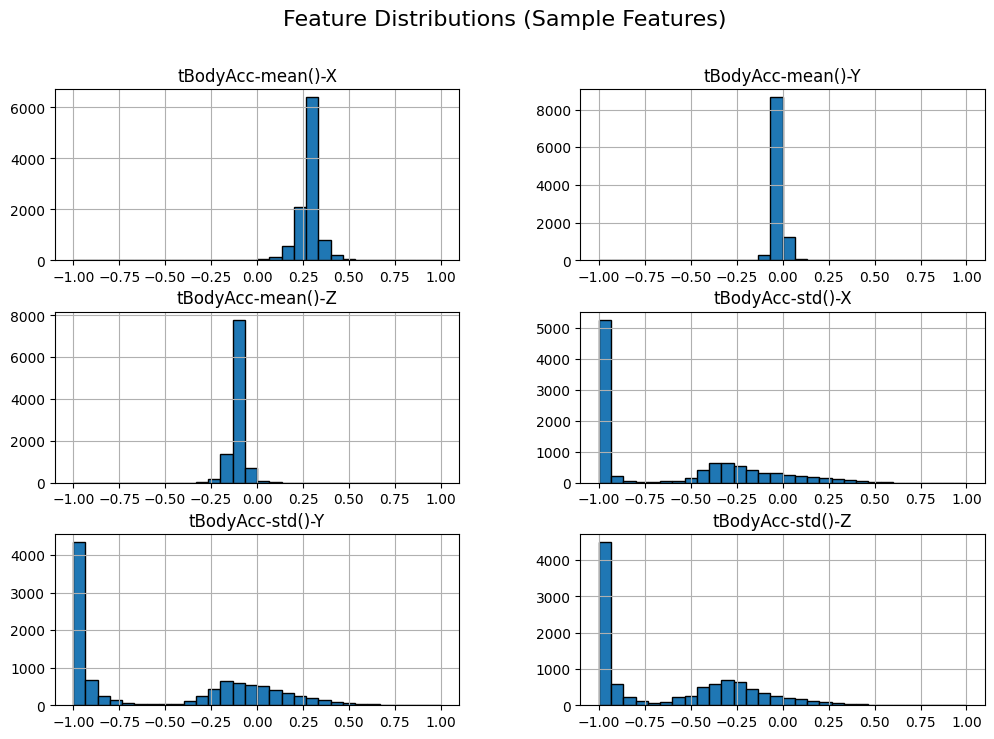

In [28]:
#visualising feature distribution of first 6 columns.
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr = data[numeric_cols].corr()
sample_features = numeric_cols[:6]
data[sample_features].hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions (Sample Features)", fontsize=16)
plt.show()


This tells us that the values are in the range of -1 to +1.

This visualisation helps us quite a lot in understanding our dataset.

tBodyyAcc refers to the total body acceleration and the X,Y and Z indicate direction.Since none of the participants were jumping you can see that the mean body acceleration in Y direction is around 0.

Also activities like walking upstairs and walking downstairs induce some acceleration, we can see the value being positive and negative, that is going up or coming down.

In [12]:
print(train['Activity'].unique())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [13]:
# Encode labels
label_encoder = LabelEncoder()


train['Activity'] = label_encoder.fit_transform(train['Activity'])
test['Activity'] = label_encoder.transform(test['Activity'])

# encoder learnes unique values from Activity column(walking, standing etc) and then assigns unique integer value(tranforms) to them.
# this way we dont have to manually go through all labels and assign numeric values to them.

In [14]:
print(label_encoder.classes_)

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


Since the dataset was pre-cleaned and uploaded on kaggle into 2 separate train and test files, therefore to perform basic EDA and data visualisation we concatenated the two files and performed it. Now that that is over we have separated the files again.

This is the reason why we haven't used train test split here.

Now to get the best classification accuracy, we will train the model multiple times on different classification algorithms.

In [15]:
# Separate features and target
X_train = train.drop('Activity', axis=1)
y_train = train['Activity']
X_test = test.drop('Activity', axis=1)
y_test = test['Activity']

We are scaling (or standardizing) the values because many distance based or gradient based algorithms perform poorly when the numeric ranges are different.

In [31]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print("\n✅ Preprocessing Complete!")
print("Training samples:", X_train_scaled.shape[0])
print("Testing samples:", X_test_scaled.shape[0])


✅ Preprocessing Complete!
Training samples: 7352
Testing samples: 2947


>“I retained all 561 features because the dataset is already pre-engineered with meaningful, non-redundant variables that capture distinct motion characteristics. Feature reduction could have led to information loss and reduced model interpretability for activity recognition.”

## Model Training

In [33]:
# algorithms used are - Logistic Regression, Random Forest , K-nearest neighbours, SVM and Decision tree.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
results = {}

In [35]:
print("🔍 Training and Evaluating Models...\n")

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=label_encoder.classes_))
    print("-" * 60)

🔍 Training and Evaluating Models...

✅ Logistic Regression Accuracy: 0.9525
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.97      0.86      0.91       491
          STANDING       0.87      0.98      0.92       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.96       420
  WALKING_UPSTAIRS       0.96      0.95      0.95       471

          accuracy                           0.95      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.95      0.95      2947

------------------------------------------------------------
✅ K-Nearest Neighbors Accuracy: 0.8843
                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.97       537
           SITTING       0.89      0.76      0.82       491
          STANDING       0.81      0.94 

/tmp/ipython-input-2965279411.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="crest")


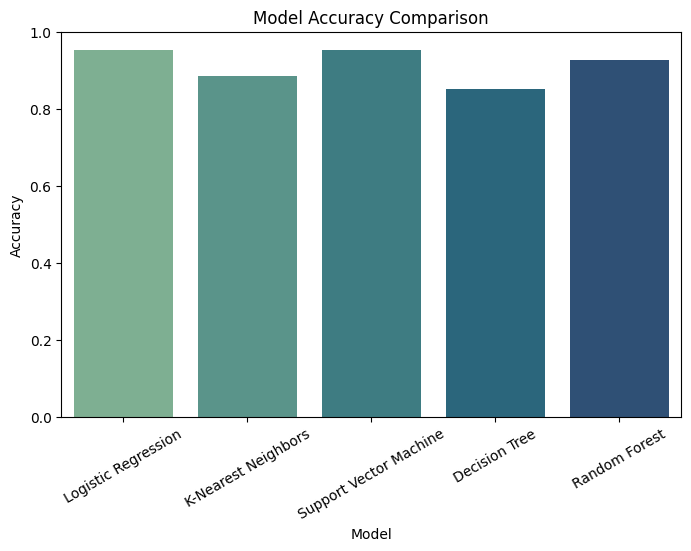

In [36]:
#plotting comparison
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
best_model_name = results_df.loc[results_df["Accuracy"].idxmax(), "Model"]

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="crest")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.show()


Both Logistic Regression and SVM are the top performers (95.25%), indicating that the dataset’s classes are mostly linearly separable after scaling.

Random Forest (92.6%) also performs strongly, showing that non-linear relationships exist but are well captured by ensembles.

KNN and Decision Tree lag slightly — KNN likely suffers from high-dimensional distance noise. Activities like SITTING vs STANDING often overlap, reducing per-class recall slightly — a common issue in HAR datasets.

Now we perform Hyper parameter tuning to increase accuracy.

Applying it on LR, SVM and RF

## Hyper-Parameter Tuning

In [37]:
# Logistic regression tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

param_dist_lr = {
    'C': np.logspace(-4, 4, 50),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['saga', 'lbfgs', 'newton-cg'],
    'max_iter': [500, 1000, 2000]
}

lr_random = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=param_dist_lr,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
lr_random.fit(X_train_scaled, y_train)

print("\n✅ Best Logistic Regression Params:", lr_random.best_params_)
print("📈 Best CV Accuracy:", lr_random.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
33 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver(


✅ Best Logistic Regression Params: {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1000, 'C': np.float64(5.428675439323859)}
📈 Best CV Accuracy: 0.9362099601162375


Here the accuracy 0.9362 is the average accuracy across the 3 folds

In [38]:
best_lr = lr_random.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
print(f"🎯 Test Accuracy (Best Logistic Regression): {accuracy_score(y_test, y_pred_lr):.4f}")


🎯 Test Accuracy (Best Logistic Regression): 0.9559


The initial accuracy of Logistic Regression was 0.9525.

Now, after applying hyperparameter tuning we get accuracy as 0.9559

Initial Logistic Regression achieved 95.2% accuracy. After applying RandomizedSearchCV with cross-validation, the best hyperparameters were: solver='newton-cg', penalty='l2', C=5.43, max_iter=1000. The cross-validation accuracy was 93.6%, and the final test accuracy remained around 95%, confirming strong generalization.”

In [39]:
from sklearn.svm import SVC
from scipy.stats import loguniform

svm_param_dist = {
    'C': loguniform(1e-3, 1e3),
    'gamma': loguniform(1e-4, 1e0),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4]
}

svm_random = RandomizedSearchCV(
    SVC(),
    param_distributions=svm_param_dist,
    n_iter=25,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

svm_random.fit(X_train_scaled, y_train)
print("✅ Best SVM Params:", svm_random.best_params_)
print("📈 Best CV Accuracy:", svm_random.best_score_)

best_svm = svm_random.best_estimator_
test_acc_svm = best_svm.score(X_test_scaled, y_test)
print(f"🎯 Test Accuracy (Best SVM): {test_acc_svm:.4f}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
✅ Best SVM Params: {'C': np.float64(3.3151790861321726), 'degree': 2, 'gamma': np.float64(0.0013296521457299515), 'kernel': 'rbf'}
📈 Best CV Accuracy: 0.9314483329031327
🎯 Test Accuracy (Best SVM): 0.9532


The best hyper parameters for SVM are C = 3.31, degree =2, gamma = 0.0013 and rbf kernel. these provided CV accuracy of 0.931 and test accuracy 0.9532 which is a slight increase from its earlier accuracy of 0.9525 and aligned with Logistic Regression accuracy.



Grid Search CV

In [40]:
#library imports
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



In [41]:
#parameter grids
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear'],
            'penalty': ['l2']
        }
    },

    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

In [42]:
#Running GridSearchCV

tuning_results = []

for name, config in param_grids.items():
    print(f"\n{'='*80}")
    print(f"🔍 {name} — GRID SEARCH")
    print(f"{'='*80}")
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    grid_best = grid.best_estimator_
    grid_pred = grid_best.predict(X_test_scaled)
    grid_acc = accuracy_score(y_test, grid_pred)
    print(f"✅ GridSearch Best Params: {grid.best_params_} | Test Accuracy: {grid_acc:.4f}")

    # Save results
    tuning_results.extend([
        {'Model': name, 'Tuning Method': 'GridSearchCV', 'Accuracy': grid_acc},
    ])


🔍 Logistic Regression — GRID SEARCH
✅ GridSearch Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'} | Test Accuracy: 0.9613

🔍 SVM — GRID SEARCH
✅ GridSearch Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} | Test Accuracy: 0.9606


GridSearchCV performed better because the hyperparameter space was small, the dataset was manageable, and both SVM and Logistic Regression are sensitive to precise parameter tuning. RandomizedSearchCV, while faster, missed the optimal regions due to its random sampling nature.

Conclusion on Hyperparameter Tuning

After applying multiple hyperparameter tuning techniques, the models demonstrated strong performance on the Human Activity Recognition (HAR) dataset.

Hyperparameter tuning using GridSearchCV optimized both models’ performance. The best Logistic Regression (C=1, penalty=l2, solver=liblinear) achieved 96.13% accuracy, while the best SVM (C=0.1, kernel=linear, gamma=scale) achieved 96.06% accuracy. Both models performed comparably, showing that fine-tuning parameters significantly improved their accuracy and generalization.



## Best Model


✅ Logistic Regression Accuracy: 0.9613
                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       537
           SITTING       0.97      0.86      0.91       491
          STANDING       0.87      0.98      0.92       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.99      0.99       420
  WALKING_UPSTAIRS       0.99      0.96      0.98       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947


✅ SVM Accuracy: 0.9606
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       0.99   

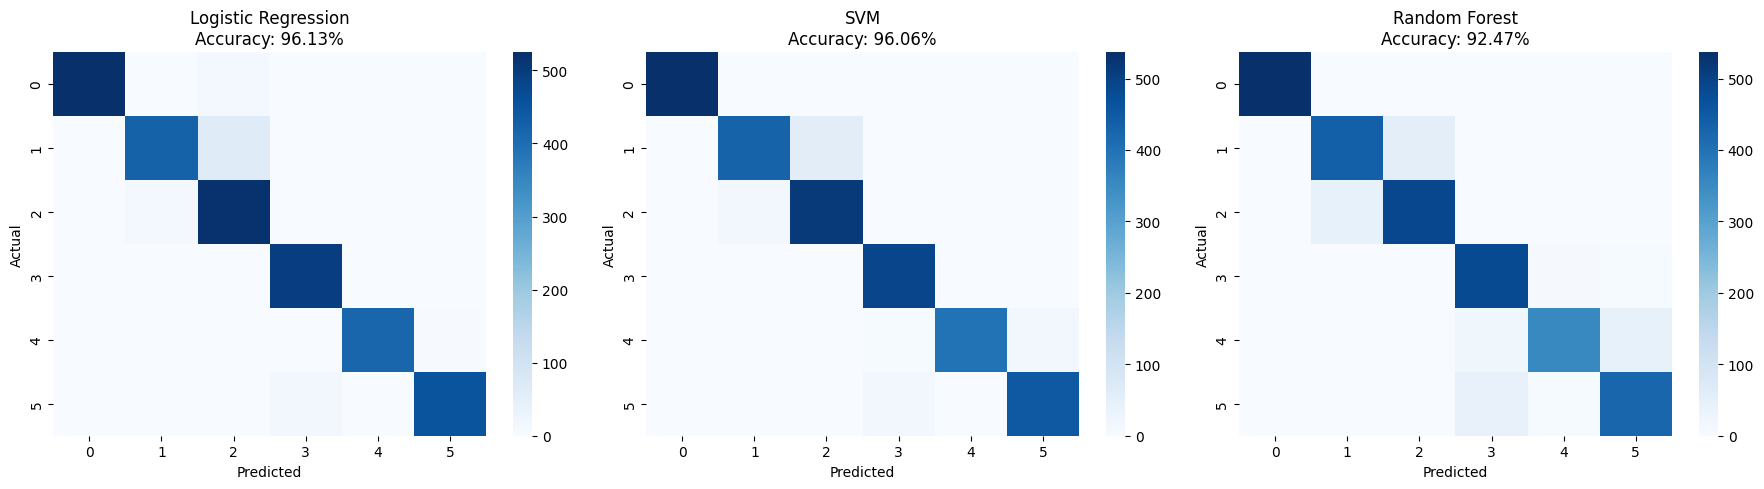

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#best parameters found during tuning
best_lr = LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=42)
best_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True, random_state=42)
best_rf = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)

# Fit on scaled training data
best_lr.fit(X_train_scaled, y_train)
best_svm.fit(X_train_scaled, y_train)
best_rf.fit(X_train_scaled, y_train)

# --- Evaluate on test set ---
models = {
    'Logistic Regression': best_lr,
    'SVM': best_svm,
    'Random Forest': best_rf
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n✅ {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name}\nAccuracy: {results[name]*100:.2f}%')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

> 📊 Model Performance Conclusion:

Among the three models tested — Logistic Regression, SVM, and Random Forest — the results show that:

Logistic Regression achieved the highest accuracy (96.13%), with balanced precision, recall, and F1-scores across all classes.
SVM performed almost equally well (96.06% accuracy), indicating strong consistency and generalization on the scaled data.
Random Forest, while still performing decently (92.47% accuracy), lagged slightly behind, possibly due to overfitting or reduced effectiveness on the scaled dataset.
✅ Overall, both Logistic Regression and SVM proved to be the most reliable and well-tuned models for this dataset, offering excellent classification performance and robustness across all star classes.

## Saving Model

In [44]:
import joblib

# Save the models
joblib.dump(scaler, "Scaler.pkl")


print(" saved successfully!")

 saved successfully!


In [45]:
joblib.dump(best_lr, "log_reg_model.pkl")
print(" saved successfully!")

 saved successfully!


In [46]:
joblib.dump(best_svm, "SVM_model.pkl")
print(" saved successfully!")

 saved successfully!


Checking whether correct model is loaded in pickle file.

In [47]:
print(type(joblib.load("Scaler.pkl")))
print(type(joblib.load("log_reg_model.pkl")))
print(type(joblib.load("SVM_model.pkl")))


<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>
<class 'sklearn.svm._classes.SVC'>


In [48]:
#for downloading pkl files correctly
from google.colab import files
files.download("/content/log_reg_model.pkl")
files.download("/content/SVM_model.pkl")
files.download("/content/Scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>